In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#  TIP: 1. Research and import desired feature selection methods from https://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_selection
#       2. For k-fold cross validation, consider https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html 
#                                         and/or https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate
#       3. Research and import desired classification algorithms from https://scikit-learn.org/stable/supervised_learning.html
#       4. Research and import desired clustering algorithms from https://scikit-learn.org/stable/modules/clustering.html

# Instructions

For each question, a rough outline has been provided to help you get started under "Part 1.x.x: Work". Feel free to either follow the outline or use your own method for solving the problem. In either case, however, please make sure to include your work in these sections and fill in your answer in the cell titled "Part 1.x.x: Answer".

**Embedding Images in the Notebook**

To upload an image in a markdown cell in Jupyter Notebook:
1. Go to the menu bar and select Edit -> Insert Image.

2. Select image from your disk and upload.

3. Press Ctrl+Enter or Shift+Enter.

This will make the image as part of the notebook and you don't need to upload it in the directory

**Export Jupyter Notebooks**  
In your local computer, open the notebook you would like to export and navigate to 'File' at the top menu bar. By clickling 'File', you can find 'Download as' in the drop-down menu. Select the format you want to export the notebook as: either directly as a pdf, or if you download it as an html file, use a website like [html2pdf.com](https://html2pdf.com) to convert it to a pdf file for submission on Gradescope.

Colab does not seem to support exporting their notebooks to other formats, so if you choose to use Colab, you will need to download the notebook as an .ipynb file before following the steps above on your local machine.

# Question 1

### Read Data

In [3]:
PATH_TO_Q1_DATA = 'data/HW2_Q1_DATA.csv'
df = pd.read_csv(PATH_TO_Q1_DATA)

In [4]:
pd.set_option('display.max_columns', None)  # show all columns with head()
df.head()

,4E-BP1,ADA,AREG,AXIN1,BACH1,BIRC2,BTN3A2,CASP-8,CCL11,CCL19,CCL20,CCL23,CCL25,CCL28,CCL3,CCL4,CD244,CD28,CD40,CD5,CD6,CD83,CD8A,CDCP1,CDSN,CKAP4,CLEC4A,CLEC4C,CLEC4D,CLEC4G,CLEC7A,CNTNAP2,CSF-1,CST5,CX3CL1,CXADR,CXCL1,CXCL10,CXCL11,CXCL5,CXCL6,CXCL9,DCBLD2,DCTN1,DFFA,DNER,DPP10,EDAR,EIF4G1,EIF5A,EN-RAGE,FAM3B,FCRL6,FGF-19,FGF-21,Flt3L,GLB1,HCLS1,HEXIM1,HGF,HNMT,HSD11B1,IFN-gamma,IFNLR1,IL-10RA,IL-10RB,IL-12B,IL-17A,IL-17C,IL-18R1,IL-20RA,IL18,IL5,IL6,IL7,IL8,IRAK1,ITGA11,ITGA6,ITGB6,ITM2A,JUN,KLRD1,KRT19,LAG3,LAMP3,LAP TGF-beta-1,LIF-R,LILRB4,LY75,MASP1,MCP-1,MCP-2,MCP-4,MILR1,MMP-1,MMP-10,NCR1,NT-3,NTF4,OPG,OSM,PADI2,PD-L1,PIK3AP1,PPP1R9B,PRDX1,PRDX3,PRDX5,PSIP1,PTH1R,SCF,SH2D1A,SIRT2,SIT1,SLAMF1,SPRY2,SRPK2,STAMBP,STC1,TGF-alpha,TNF,TNFB,TNFRSF9,TNFSF14,TRAIL,TRANCE,TREM1,TRIM21,TWEAK,uPA,VEGFA,ZBTB16,Condition
0,27.718344,5.734644,13.165561,6.770850,0.000000,9.756987,0.000000,6.161444,0.000000,3.545201,0.000000,8.817527,7.508032,2.422742,0.000000,6.843969,18.773615,0.000000,18.730868,7.455245,26.659559,4.189390,1.076872,0.000000,0.000000,0.000000,11.826296,7.788437,0.000000,16.220314,1.109837,10.874609,5.293797,9.480353,3.203696,6.252064,0.000000,26.693942,0.000000,0.000000,7.368058,13.041884,0.000000,9.637007,0.000000,13.397451,3.405191,1.438115,0.000000,0.779473,0.000000,3.286780,4.291350,4.174334,0.000000,8.912544,0.000000,15.399080,17.348777,11.560710,0.000000,0.000000,0.815476,5.170512,4.020843,0.000000,0.000000,2.436370,0.000000,0.000000,0.000000,1.622146,4.472475,0.000000,0.000000,0.000000,8.039560,15.033599,12.192460,2.470746,13.304297,7.517567,0.000000,7.864877,4.191008,3.132020,8.541414,0.000000,9.163430,1.620337,0.000000,0.000000,0.000000,0.000000,0.000000,28.856916,9.504446,0.000000,0.000000,3.975596,16.192791,0.000000,0.000000,0.000000,0.985249,11.178848,15.181206,14.145702,16.986303,8.658794,7.202860,0.964152,2.125859,3.510396,15.197014,0.000000,0.000000,0.000000,6.309584,8.302339,12.000191,0.000000,0.998187,17.015074,0.000000,0.000000,0.000000,0.000000,10.462921,8.162390,3.209589,0.0,7.846367,CoV2
1,0.000000,13.791418,5.884233,0.396271,12.521125,0.000000,7.558042,4.814161,0.000000,0.000000,0.555607,10.962094,0.000000,2.648440,0.000000,0.000000,7.966805,2.731494,0.699221,11.196644,5.726753,6.832898,10.350866,0.239732,6.455786,4.033267,0.000000,0.000000,18.942073,3.111585,33.275970,3.360276,6.135610,0.000000,0.000000,0.000000,1.859586,6.974876,0.000000,16.929481,0.000000,13.068265,5.977234,19.969867,14.074089,4.800421,0.000000,3.175309,5.423078,43.495684,1.933688,0.000000,8.305734,0.000000,31.627888,2.767051,2.895586,15.693953,7.802739,0.000000,0.000000,5.635262,32.458745,1.653591,11.295072,0.000000,7.852373,6.740466,5.331868,4.422822,0.000000,0.000000,0.841615,0.251800,6.471288,0.000000,2.305014,11.732910,5.069960,6.585386,9.957475,0.000000,0.237587,0.000000,1.785264,0.000000,7.199421,2.698841,0.267144,0.000000,9.372084,0.000000,7.774374,13.806183,0.000000,0.000000,4.643473,15.595458,0.000000,0.000000,10.105447,9.701070,1.397358,2.375529,0.000000,13.456537,0.000000,0.000000,7.482231,10.512135,6.418627,0.000000,15.694330,2.552504,20.129469,14.268805,15.909556,1.923489,0.000000,12.683408,3.810757,5.165126,12.456605,6.177402,5.582112,28.143195,8.333056,1.801868,2.697739,9.918408,1.576225,0.0,1.988058,CoV2
2,0.000000,0.000000,2.303576,14.225052,3.579328,0.000000,7.902642,0.000000,0.896923,0.000000,0.000000,6.829464,6.176597,36.725478,14.500758,2.852927,10.440139,0.000000,1.984527,12.205972,4.904689,6.295782,5.977952,0.000000,35.676186,21.463649,10.210970,0.000000,13.580720,6.555678,11.049189,7.134474,13.464460,0.000000,0.000000,0.000000,7.716326,21.698020,0.000000,0.000000,3.640113,17.448447,0.000000,7.834174,8.478314,3.700956,0.000000,0.000000,8.284261,1.611970,0.000000,4.126854,14.547810,0.465372,2.051328,12.058449,4.064884,0.000000,19.906368,19.271130,1.949508,0.000000,0.000000,0.000000,2.522496,0.000000,6.872648,2.216933,4.436103,7.143954,8.589794,14.503386,6.697591,22.231499,4.987172,17.674558,4.813506,7.469

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 134 entries, 4E-BP1 to Condition
dtypes: float64(133), object(1)
memory usage: 1.0+ MB


In [6]:
# Find categorical columns
list(set(df.columns)-set(df._get_numeric_data().columns))

['Condition']

In [7]:
df.Condition.value_counts()

CoV2        341
Kawasaki    333
MIS-C       326
Name: Condition, dtype: int64

### Define data object
Contains separate data and target objects to make dataset more user friendly

In [8]:
#?? hotcode categories
class ImmunologicalData:
    
    def __init__(self, as_frame):
        self.data = None
        self.target = None
        self.feature_names = None
        self.frame = None
        
        if as_frame:
            df = pd.read_csv('data/HW2_Q1_DATA.csv')
            
            # hotcode categorical label
            def get_condition_num(condition):
                if condition == "CoV2":
                    return 1
                elif condition == "Kawasaki":
                    return 2
                elif condition == "MIS-C":
                    return 3
                else:
                    raise IllegalArgumentException("Condition not recognized.")
                    
            df["Condition_Num"]=df["Condition"].apply(get_condition_num) 
            
            self.frame = df
            self.data = df.drop(["Condition", "Condition_Num"], axis=1)            
            self.target = df["Condition_Num"]           
            self.feature_names = list(df.columns)            

## Part 1.1: Filter-based Feature Selection

### Part 1.1.1: Work

In [125]:
# TODO: Apply a filter-based feature selection method of your choice using 10-fold cross validation 
#       and use the results to choose the top 20 features

# TIP: Scikit-learn provides implementations of many useful statistical measures.

#       Pearson’s Correlation Coefficient: f_regression()
#       ANOVA: f_classif()
#       Chi-Squared: chi2()
#       Mutual Information: mutual_info_classif() and mutual_info_regression()

#      Also, SciPy provides implementations of many more statistics, such as
#      Kendall’s tau (kendalltau) and Spearman’s rank correlation (spearmanr).

#### Learning example: Pearson's correlation coefficient with f-test for single regressor column
high negative or positive correlation results in high F-score

In [10]:
from sklearn.feature_selection import f_regression
from scipy.stats import pearsonr

# test data
a = np.array([[1, 6, 5], [2, 4, 5], [3, 5, 5], [4, 3, 5], [5, 2, 5]]) # create an array
df_sample=pd.DataFrame(data=a, columns=["regressor1", "label1", "extra"])
print(df_sample)
print()

# split dataframe into separate regressors DataFrame and label Series
X_sample = df_sample.drop(["label1", "extra"], axis=1)
y_sample = df_sample["label1"]

# pearson's correlation coefficient
# The Pearson correlation evaluates the linear relationship between two continuous variables.
print(df_sample.drop("extra", axis=1).corr(method='pearson')) # expecting -0.90
print()

# f-test of pearson's correlation coefficient
F_scores, p_values = f_regression(X_sample, y_sample, center=True)
print(F_scores) # expecting 12.78947368
print(p_values) # expecting 0.03738607

   regressor1  label1  extra
0           1       6      5
1           2       4      5
2           3       5      5
3           4       3      5
4           5       2      5

            regressor1  label1
regressor1         1.0    -0.9
label1            -0.9     1.0

[12.78947368]
[0.03738607]


### Pearson's correlation coefficient using 10-fold cross validation

In [11]:
from sklearn.model_selection import KFold
from sklearn.feature_selection import f_regression

# ?? goal is to identify features that are highly correlated and remove them, to have 20 left
# ?? goal is to identify the 20 features that are most correlated

# build data object
idata = ImmunologicalData(as_frame=True)

# define DataFrame to store results
df_pearson_results = pd.DataFrame(columns=['k','Regressor','F_score','P_value']).astype(dtype= {'k':'int64','Regressor':'object', 'F_score':'float64','P_value':'float64'})

#?? how to remember which rows in which fold
#?? where does k-fold come into the picture? test vs training data?
#?? how to keep track of which column for which F_score?
#?? what to do with test data here
kf=KFold(n_splits=10, shuffle=False)  
for k, (train, test) in enumerate(kf.split(idata.data, idata.target)):

    # get training rows for this fold
    X_train = idata.data.iloc[train] 
    y_train = idata.target.iloc[train]
    
    # calculate f-test for Pearson's correlation coefficient for this fold
    f_scores, p_values = f_regression(X_train, y_train, center=True)
                
    for i, f_score in enumerate(f_scores):
        
        # add row to result DataFrame for each Fold,Feature,F-score
        col_name = idata.feature_names[i]
        p_value = p_values[i]
        new_row = pd.Series([k+1,col_name,f_score,p_value], index = df_pearson_results.columns)
        df_pearson_results = df_pearson_results.append(new_row, ignore_index=True)
        

In [12]:
df_pearson_results.head()

,k,Regressor,F_score,P_value
0,1,4E-BP1,0.142749,0.705653
1,1,ADA,1.224572,0.268762
2,1,AREG,0.259387,0.610667
3,1,AXIN1,1.118628,0.290498
4,1,BACH1,3.997947,0.045857


### Computer Average and Visualize results

<AxesSubplot:>

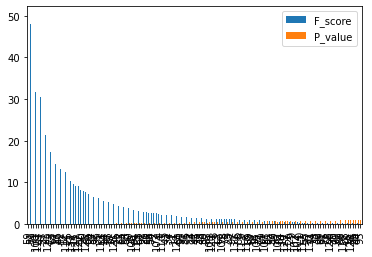

In [13]:
# compute average F_score and p_value across all training sets
# reset_index() to add Regressor column to DataFrame
df_pearson_means=df_pearson_results.drop("k",axis=1).groupby(["Regressor"]).mean().reset_index()
df_pearson_sorted=df_pearson_means.sort_values(by="F_score", ascending=False)
df_pearson_sorted.plot.bar()

### Select top 20 features

In [14]:
# select 20 regressors with largest F-scores
df_pearson_top_20=df_pearson_sorted.head(20)
print(df_pearson_top_20)
print()

list_pearson_top_20 = list(df_pearson_top_20["Regressor"])
print(*list_pearson_top_20, sep=", ")

    Regressor    F_score       P_value
59        HGF  49.816711  1.856227e-11
51      FAM3B  48.003948  2.944484e-11
79      ITGB6  34.119862  2.499567e-08
100       OPG  31.586697  1.972983e-07
119      STC1  31.120322  4.848779e-08
47       EDAR  30.549715  6.217153e-08
27     CLEC4C  27.522199  5.974571e-07
23      CDCP1  21.292353  1.502960e-05
121       TNF  17.330040  8.653982e-05
73        IL6  17.161013  1.220006e-04
67     IL-17A  15.419758  1.803032e-04
19        CD5  14.299028  2.647015e-04
46      DPP10  13.890368  2.951712e-04
42     DCBLD2  13.070751  4.005152e-04
12      CCL25  13.068090  4.579635e-04
114      SIT1  12.370420  9.130655e-04
26     CLEC4A  11.778288  1.287744e-03
132       uPA  10.165089  3.137807e-03
15       CCL4   9.454490  4.196223e-03
127     TREM1   9.020582  4.074127e-03

HGF, FAM3B, ITGB6, OPG, STC1, EDAR, CLEC4C, CDCP1, TNF, IL6, IL-17A, CD5, DPP10, DCBLD2, CCL25, SIT1, CLEC4A, uPA, CCL4, TREM1


## Mutual Information (test)

In [15]:
from sklearn.model_selection import KFold
from sklearn.feature_selection import mutual_info_classif,mutual_info_regression

# get data
idata = ImmunologicalData(as_frame=True)
X = idata.data
y = idata.target


# perform mutual information
# ??regression or classif
mi = mutual_info_classif(X,y)

<AxesSubplot:>

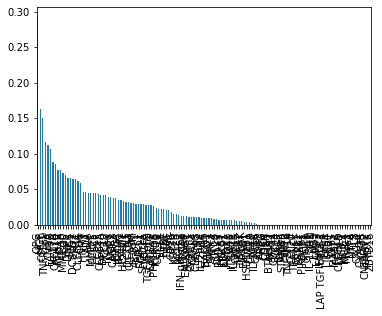

In [16]:
# convert to Series and add Regressors as index for sorting
s_mi = pd.Series(mi)
s_mi.index = X.columns
s_mi.sort_values(ascending=False, inplace=True)
s_mi.plot.bar()


# df_mutual = pd.DataFrame(columns=['Regressor','Mutual_Information']).astype(dtype= {'Regressor':'object', 'Mutual_Information':'float64'})

# for i, mi in enumerate(result):
#     # add row to result DataFrame for each F-score
#     col_name = idata.feature_names[i]
#     new_row = pd.Series([col_name,mi], index = df_mutual.columns)
#     df_mutual = df_mutual.append(new_row, ignore_index=True)


# df_mi_top_20=df_mutual.sort_values(by="Mutual_Information", ascending=False).head(20)
# print(df_mi_top_20)
# print()

# list_mi_top_20 = list(df_mi_top_20["Regressor"])
# print(*list_mi_top_20, sep=", ")

In [17]:
# get top 20
s_mi.nlargest(n=20)

OPG        0.292199
HGF        0.163164
CSF-1      0.150273
TNFRSF9    0.115866
uPA        0.112120
FAM3B      0.106310
IL-17A     0.088186
CXCL10     0.085488
PTH1R      0.077349
EDAR       0.076419
MMP-10     0.072402
CD5        0.070503
DNER       0.066230
STC1       0.065970
DCBLD2     0.064464
SIT1       0.064454
CLEC4C     0.061920
CD6        0.058060
HNMT       0.046552
IL7        0.045727
dtype: float64

### Part 1.1.1: Answer

List the top 20 features you found: 
**HGF, FAM3B, ITGB6, OPG, STC1, EDAR, CLEC4C, CDCP1, TNF, IL6, IL-17A, CD5, DPP10, DCBLD2, CCL25, SIT1, CLEC4A, uPA, CCL4, TREM1**

### Part 1.1.2: Work

In [18]:
# TODO: Create and plot a 20 x 20 correlation heat map using your features from part 1.1.1

# TIP: 1. Pandas has a correlation functionality for dataframes
#         https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html
#      2. Seaborn has a heatmap functionality
#         https://seaborn.pydata.org/generated/seaborn.heatmap.html

### Heatmap

<AxesSubplot:>

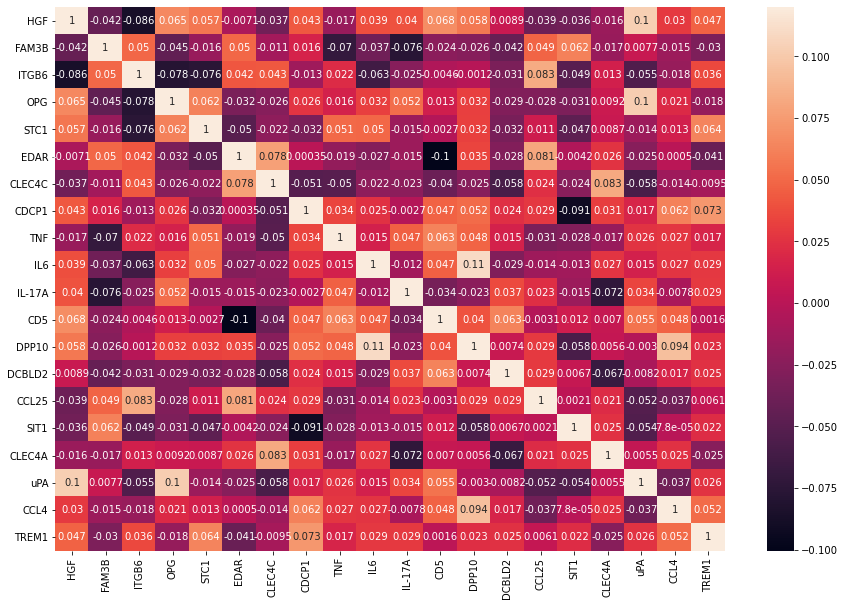

In [19]:
# select top 20 features
# list_top_20_mi=list(s_mi.nlargest(n=20).index)
df_pearson_top_20_features=idata.data.loc[:][list_pearson_top_20]


# # ?? why is my heatmap so bad, do I need to scale the data first? should I not convert Condition to number?
# heatmap
plt.figure(figsize=(15,10))
top_20_cor=df_pearson_top_20_features.corr(method='pearson')
sns.heatmap(top_20_cor,annot=True,vmax=0.12)

### Calculate average heatmap value

In [20]:
# calculate average value of heatmap
# ?? correct way to do this, count diagonal?
top_20_heatmap_arr = top_20_cor.to_numpy()

total = 0
for i in range(0,20):
    for j in range (0,20):
        total += top_20_heatmap_arr[i][j]
print(total/400)

0.05393784813093121


### Part 1.1.2: Answer

**Plot the heatmap in one of the above cells or embed it as an image in this cell**

What is the average of the values in the heatmap? **0.05393784813093121**


### Part 1.1.3: Work

In [21]:
# TODO: Train a classifier using your top 1, top 2, ..., top 20 features from part 1.1.1
#       and plot the 10-fold cross-validated accuracy as a function of the number of features

# TIP: 1. scikit-learn has a great collection of classifiers: https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html
#      2. scikit-learn also supports different ways of cross-validation: https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation-iterators

### Define SVM classifier

In [22]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

def train_svm_classifier(X,y,k):
    
    # get splits
    kfold = KFold(n_splits=k, shuffle=False)
    
    # define SVM model
    classifier = make_pipeline(StandardScaler(), SVC(gamma='auto'))
    
    # perform cross-validation
    scores = cross_val_score(classifier, X, y, scoring='accuracy', cv=kfold, n_jobs=-1)

    # return the average
    return np.average(scores)

### Train classifier using subsets of top 20 features and 10-fold cross validation

In [23]:
# list to store results
top_20_svm_results = list()
y = idata.target

# select 1 to 20 features from top 20
for i in range(1,21):
    
    # create dataframe with only those features
    top_20_subset=list_pearson_top_20[:i]
    X=idata.data.loc[:][top_20_subset]
    print(X.shape)
    
    # get average score from cross validation
    avg = train_svm_classifier(X, y, k=10)
    print(avg)

    # store result
    top_20_svm_results.append([i,avg])

(1000, 1)
0.49300000000000005
(1000, 2)
0.536
(1000, 3)
0.542
(1000, 4)
0.6880000000000001
(1000, 5)
0.7
(1000, 6)
0.72
(1000, 7)
0.709
(1000, 8)
0.71
(1000, 9)
0.696
(1000, 10)
0.673
(1000, 11)
0.67
(1000, 12)
0.69
(1000, 13)
0.692
(1000, 14)
0.6940000000000001
(1000, 15)
0.698
(1000, 16)
0.6970000000000001
(1000, 17)
0.704
(1000, 18)
0.709
(1000, 19)
0.7020000000000001
(1000, 20)
0.709


### Visualize training results

<AxesSubplot:xlabel='number_of_features', ylabel='accuracy'>

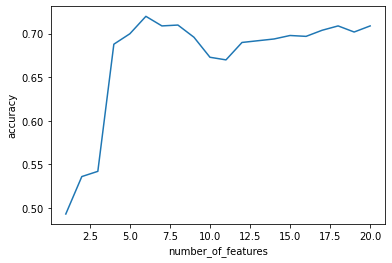

In [24]:
df_top_20_classifier_results = pd.DataFrame(data=top_20_svm_results, columns=['number_of_features','accuracy'])

sns.lineplot(data=df_top_20_classifier_results, x="number_of_features", y="accuracy")

### Part 1.1.3: Answer

**Include the plot as the output of one of the above cells or embed it as an image in this cell**

### Part 1.1.4: Work

In [25]:
# TODO: 1. Devise a method for determining a threshold that can be used to separate
#          truly relevant features from those that are spurious
#       2. Apply this method to the data to obtain a new set of features
#       3. Re-train a classifier with the new features using 10-fold cross validation

In [26]:
#?? different from simply take the top 10 percent or something like that
#?? remove features which are highly correlated with each other first

### Find Relevant Features via threshold strategy

In [27]:
relevant_features=list_pearson_top_20 #??revise strategy

### Train SVM classifier using relevant features and 10-fold cross validation

In [28]:
# create dataframe with only those features
X=idata.data.loc[:][relevant_features]
y=idata.target
print(X.shape)

# get average score from cross validation
train_svm_classifier(X, y, k=10)

(1000, 20)


0.709

### Part 1.1.4: Answer

Briefly describe the method you devised for determinining a threshold for truly relevant features: **YOUR EXPLANATION HERE**

List the new set of features obtained from applying your method to the data: **YOUR ANSWER HERE**

What was the 10-fold cross-validated accuracy of the classifier trained with these new features? **YOUR ANSWER HERE**

### Part 1.1.5: Work

In [29]:
# TODO: 1. Use a clustering algorithm of your choice to cluster
#          the features you found in part 1.1.4 into 10 clusters
#       2. Choose a representative feature from each cluster and
#          train a classifier with these features using 10-fold
#          cross validation

### Cluster variables using Kmeans

In [30]:
from sklearn.cluster import KMeans

# build data
relevant_features=idata.feature_names[:50] # mockup for now

# transpose data to cluster by feature
df_features=idata.data.loc[:][relevant_features].T  

# kmeans clustering with k=10
kmeans = KMeans(n_clusters=10).fit(df_features)
labels = kmeans.labels_

# add features as index
s_labels = pd.Series(labels)
s_labels.index = idata.data.loc[:][relevant_features].columns
s_labels

4E-BP1     3
ADA        6
AREG       6
AXIN1      6
BACH1      4
BIRC2      4
BTN3A2     4
CASP-8     4
CCL11      6
CCL19      4
CCL20      0
CCL23      6
CCL25      6
CCL28      6
CCL3       6
CCL4       4
CD244      4
CD28       4
CD40       6
CD5        6
CD6        6
CD83       6
CD8A       8
CDCP1      4
CDSN       6
CKAP4      6
CLEC4A     4
CLEC4C     4
CLEC4D     6
CLEC4G     6
CLEC7A     6
CNTNAP2    6
CSF-1      6
CST5       4
CX3CL1     9
CXADR      7
CXCL1      2
CXCL10     1
CXCL11     6
CXCL5      4
CXCL6      6
CXCL9      5
DCBLD2     4
DCTN1      6
DFFA       4
DNER       6
DPP10      4
EDAR       4
EIF4G1     6
EIF5A      4
dtype: int32

### Select representative feature from each cluster

In [31]:
s_labels.sort_values(ascending=False, inplace=True)
s_representative_features = s_labels.drop_duplicates()
print(s_representative_features)
print()

representatitive_features = list(s_representative_features.index)
print(*representatitive_features, sep=", ")

CX3CL1    9
CD8A      8
CXADR     7
CDSN      6
CXCL9     5
CCL4      4
4E-BP1    3
CXCL1     2
CXCL10    1
CCL20     0
dtype: int32

CX3CL1, CD8A, CXADR, CDSN, CXCL9, CCL4, 4E-BP1, CXCL1, CXCL10, CCL20


### Train SVM classifier with representative features using 10-fold cross validation

In [32]:
# get data
X = idata.data.loc[:][representatitive_features]
y=idata.target
print(X.shape)

# get average score from cross validation
train_svm_classifier(X, y, k=10)

(1000, 10)


0.45499999999999996

### Part 1.1.5: Answer

List the representative features you chose from the 10 clusters: **YOUR ANSWER HERE**

What was the 10-fold cross-validated accuracy of the classifier trained with these representative features? **YOUR ANSWER HERE**

## Part 1.2: Wrapper-based Feature Selection

### Part 1.2.1: Work

In [33]:
# TODO: Apply a wrapper-based feature selection method of your choice to the data

# TIP: 1. Scikit learn has an implementation of recursive feature elimination (RFE)
#         https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html
#      2. The mlxtend library has very thorough documentation and great options for sequential and exhaustive feature selection
#         http://rasbt.github.io/mlxtend/user_guide/feature_selection/SequentialFeatureSelector/
#         http://rasbt.github.io/mlxtend/user_guide/feature_selection/ExhaustiveFeatureSelector/

### Define Wrapper-based feature selection

In [126]:
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.svm import SVR

def train_wrapper_model2(X,y):
    rfe = RFE(estimator=SVR(kernel='linear'), step=20)
    selector = rfe.fit(X,y)
    return selector

def add_wrapper_results_row(df, k, support):
    
    # define name for this fold's column
    col_name = "Support_Fold_" + str(k+1)
     
    # build DataFrame of this fold's results
    new_support = pd.DataFrame(support, columns=["Support_Bool"])
    new_support["Support"]=new_support["Support_Bool"].astype(int) # convert boolean to int

    # add this fold's support to the growing DataFrame
    df[col_name]=new_support["Support"]

### Perform feature selection using 10-fold cross validation

In [95]:
%%time  

# build DataFrame to capture all fold results
df_wrapper_results = pd.DataFrame(data=idata.data.columns, columns=["Feature"])

#??what to do with test data in this case
#??takes too long
kf=KFold(n_splits=10, shuffle=False)  
for k, (train, test) in enumerate(kf.split(idata.data.iloc[:100], idata.target.iloc[:100])):

    # get training rows for this fold
    X_train = idata.data.iloc[train] 
    y_train = idata.target.iloc[train]

    # perform selection
    selector = train_wrapper_model2(X_train,y_train)
    
    # add column to results
    add_wrapper_results_row(df_wrapper_results,k,selector.support_)  

CPU times: user 1min 42s, sys: 587 ms, total: 1min 43s
Wall time: 1min 47s


### Determine how many folds each feature is in

In [91]:
# print("Optimal number of features : %d" % selector.n_features_)

# # Plot number of features VS. cross-validation scores
# x_value = list(range(1, len(selector.grid_scores_) + 1))
# y_value = list(-selector.grid_scores_)
# df_selector_results = pd.DataFrame(zip(x_value,y_value), columns=["Number of features selected", "Cross validation score"])


# sns.lineplot(data=df_selector_results,x="Number of features selected", y="Cross validation score")

In [102]:
# sum the number of times feature is selected for all folds and store result in a Summary column
df_wrapper_results["Summary"]=df_wrapper_results.drop("Feature",axis=1).sum(axis=1)
df_wrapper_results.head()

,Feature,Support_Fold_1,Support_Fold_2,Support_Fold_3,Support_Fold_4,Support_Fold_5,Support_Fold_6,Support_Fold_7,Support_Fold_8,Support_Fold_9,Support_Fold_10,Summary
0,4E-BP1,0,0,0,0,1,0,0,0,1,1,3
1,ADA,1,0,0,0,1,0,0,0,1,0,3
2,AREG,1,1,1,1,1,1,1,1,1,1,10
3,AXIN1,0,1,1,0,1,0,1,0,1,1,6
4,BACH1,1,1,1,1,1,1,1,1,1,1,10


In [108]:
# select only features that are present in 8 or more folds (out of 10)
df_8_or_more = df_wrapper_results[df_wrapper_results["Summary"]>7][["Feature","Summary"]]
df_8_or_more

,Feature,Summary
2,AREG,10
4,BACH1,10
17,CD28,8
23,CDCP1,8
27,CLEC4C,10
34,CX3CL1,8
35,CXADR,9
36,CXCL1,9
43,DCTN1,10
47,EDAR,10


In [111]:
# get a list
top_wrapper_features=list(df_8_or_more["Feature"])
print(*top_wrapper_features, sep=", ")

AREG, BACH1, CD28, CDCP1, CLEC4C, CX3CL1, CXADR, CXCL1, DCTN1, EDAR, FAM3B, FCRL6, FGF-19, HCLS1, IL-18R1, IL-20RA, ITGB6, LAMP3, MASP1, NCR1, OPG, PPP1R9B, SCF, SIRT2, TNF, TRAIL, TRANCE, TREM1, uPA


### Part 1.2.1: Answer

List the top features selected in at least 8 out of 10 folds: **YOUR ANSWER HERE**

### Part 1.2.2: Work


In [ ]:
# TODO: Create and plot a 20 x 20 correlation heat map using your features from part 1.2.1

# TIP: 1. Pandas has a correlation functionality for dataframes
#         https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html
#      2. Seaborn has a heatmap functionality
#         https://seaborn.pydata.org/generated/seaborn.heatmap.html

### Select top 20 from top features list

In [128]:
df_rfe_top_20 = df_8_or_more.nlargest(20,'Summary',keep='first')

list_rfe_top_20 = list(df_rfe_top_20["Feature"])
list_rfe_top_20

['AREG',
 'BACH1',
 'CLEC4C',
 'DCTN1',
 'EDAR',
 'FCRL6',
 'MASP1',
 'PPP1R9B',
 'SIRT2',
 'TRANCE',
 'uPA',
 'CXADR',
 'CXCL1',
 'FGF-19',
 'HCLS1',
 'IL-18R1',
 'ITGB6',
 'SCF',
 'TNF',
 'CD28']

### Heatmap

<AxesSubplot:>

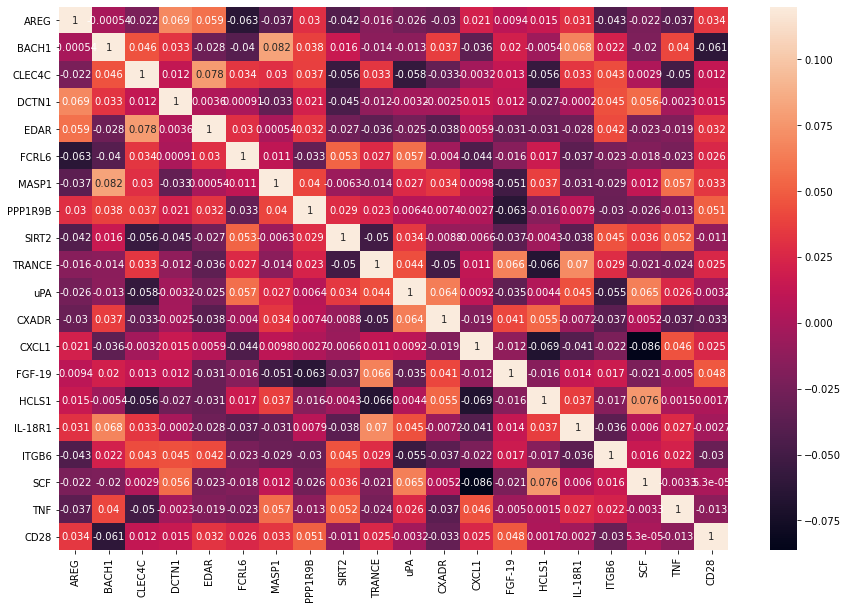

In [122]:
#?? asking for top 20 features or top features that appear in 8 or more folds? they may be different

# select data for top 20 features
df_wrapper_top_20_features=idata.data.loc[:][list_rfe_top_20]


# heatmap
plt.figure(figsize=(15,10))
top_20_rfe_cor=df_wrapper_top_20_features.corr(method='pearson')
sns.heatmap(top_20_rfe_cor,annot=True,vmax=0.12)

### Calculate Average Value of Heatmap

In [123]:
# calculate average value of heatmap
# ?? correct way to do this, count diagonal?
top_20_rfe_heatmap_arr = top_20_rfe_cor.to_numpy()

total = 0
for i in range(0,20):
    for j in range (0,20):
        total += top_20_rfe_heatmap_arr[i][j]
print(total/400)

0.051730984823471736


### Part 1.2.2: Answer

**Plot the heatmap in one of the above cells or embed it as an image in this cell**

What is the average of the values in the heatmap? **YOUR ANSWER HERE**

### Part 1.2.3: Work

In [124]:
# TODO: Train a classifier using your features from part 1.2.1 with 10-fold cross validation

# TIP: 1. scikit-learn has a great collection of classifiers: https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html
#      2. scikit-learn also supports different ways of cross-validation: https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation-iterators

### Train SVM classifier using rfe features and 10-fold cross validation

In [129]:
# create dataframe with only those features
X=idata.data.loc[:][list_rfe_top_20]
y=idata.target
print(X.shape)

# get average score from cross validation
train_svm_classifier(X, y, k=10)

(1000, 20)


0.5269999999999999

### Part 1.2.3: Answer

What was the 10-fold cross-validated accuracy of the classifier trained with these features? **YOUR ANSWER HERE**

## Part 1.3: Embedded Feature Selection

### Part 1.3.1: Work

In [ ]:
'''
TODO: Apply an embedded feature selection method of your choice using 10-fold cross validation

TIP: 1. See https://scikit-learn.org/stable/modules/classes.html#module-sklearn.tree 
        and/or https://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble
        for tree based methods
     2. Check out the SelectFromModel functionality from 
        https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFromModel.html 
'''

### Part 1.3.1: Answer

List the top features selected in at least 8 out of 10 folds: **YOUR ANSWER HERE**

### Part 1.3.2: Work

In [ ]:
'''
TODO: Create and plot a 20 x 20 correlation heat map using your features from part 1.3.1

TIP: 1. Pandas has a correlation functionality for dataframes
        https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html
     2. Seaborn has a heatmap functionality
        https://seaborn.pydata.org/generated/seaborn.heatmap.html
'''

### Part 1.3.2: Answer

**Plot the heatmap in one of the above cells or embed it as an image in this cell**

What is the average of the values in the heatmap? **YOUR ANSWER HERE**

### Part 1.3.3: Work

In [ ]:
'''
TODO: Train a classifier using your features from part 1.3.1 with 10-fold cross validation

TIP: 1. scikit-learn has a great collection of classifiers: https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html
     2. scikit-learn also supports different ways of cross-validation: https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation-iterators
'''

### Part 1.3.3: Answer

What was the 10-fold cross-validated accuracy of the classifier trained with these features? **YOUR ANSWER HERE**